In [1]:
import os # working directory management
import pandas as pd # dataframe management
import numpy as np # Numers Library 
from sklearn.model_selection import train_test_split # Function to split the data into training and test subsets
from sklearn.preprocessing import StandardScaler # Function to scale variables
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
import matplotlib.pyplot as plt # Plotting Data
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.metrics import accuracy_score # Function to calculate accuracy scores
from sklearn.utils import resample

In [2]:
data = pd.read_csv('calculable_payments.csv')  

data['Gender'] = data['Gender'].replace('Female',0)
data['Gender'] = data['Gender'].replace('Male',1)

print(data['Gender'].value_counts())

minority_class = data[data['Gender'] == 0]
majority_class = data[data['Gender'] == 1]



Gender
1    387
0     51
Name: count, dtype: int64


In [3]:
len(majority_class)

387

In [4]:
upsampled_minority = resample(minority_class,
                             replace=True,
                             n_samples=len(majority_class),
                             random_state=42)

data_balanced = pd.concat([majority_class, upsampled_minority]) # Then we add the resampled minority, and the original majority class back together again. Each contributing 516 rows
print(data_balanced['Gender'].value_counts())

Gender
1    387
0    387
Name: count, dtype: int64


In [5]:
X = data_balanced[['Amount', 'Date']]
y = data_balanced['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled)

[[ 2.00070936  0.90892783]
 [-0.29635049 -0.3127615 ]
 [-0.32003152  0.33023288]
 [-0.27266946 -0.15201291]
 [-0.29635049  0.81247867]
 [-0.29973349  0.74817924]
 [-0.14185997  1.00537699]
 [ 0.19644045  0.65173008]
 [-0.33187203 -1.14865421]
 [-0.06235937  0.97322727]
 [-0.27718013  0.94107755]
 [-0.35527115 -1.4701514 ]
 [-0.34371255 -0.53780954]
 [-0.35555306 -1.3094028 ]
 [-0.29973349  0.84462839]
 [-0.34484022  0.81247867]
 [-0.2253074   1.23042503]
 [-0.34314871 -1.53445084]
 [ 0.30920726  0.94107755]
 [-0.36254461 -1.53445084]
 [ 0.45580411 -1.43800168]
 [-0.14185997  0.97322727]
 [ 1.02031474 -1.18080392]
 [-0.2253074   1.23042503]
 [-0.31890385 -1.69519943]
 [-0.14185997 -0.24846206]
 [-0.26590345 -1.4701514 ]
 [-0.02909316  1.19827531]
 [-0.33187203 -0.40921066]
 [ 0.53474087 -0.34491122]
 [-0.2253074   1.10182615]
 [-0.35555306  0.81247867]
 [-0.02909316  0.29808316]
 [-0.31890385 -1.43800168]
 [-0.29635049  0.65173008]
 [-0.24898843  0.84462839]
 [ 1.88794255  1.10182615]
 

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)                                       # Specify the model, using 3 neighbors for this example
knn.fit(X_train_scaled, y_train) 

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)


print(f"kNN Training Accuracy: {train_accuracy_knn}")
print(f"kNN Testing Accuracy: {test_accuracy_knn}")

kNN Training Accuracy: 0.9297597042513863
kNN Testing Accuracy: 0.8497854077253219


In [7]:
train_accuracies = []
test_accuracies = []

max_neighbours = 10

for neighbors in range(1, max_neighbours + 1):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train_scaled, y_train)
    train_accuracy = knn.score(X_train_scaled, y_train)
    test_accuracy = knn.score(X_test_scaled, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

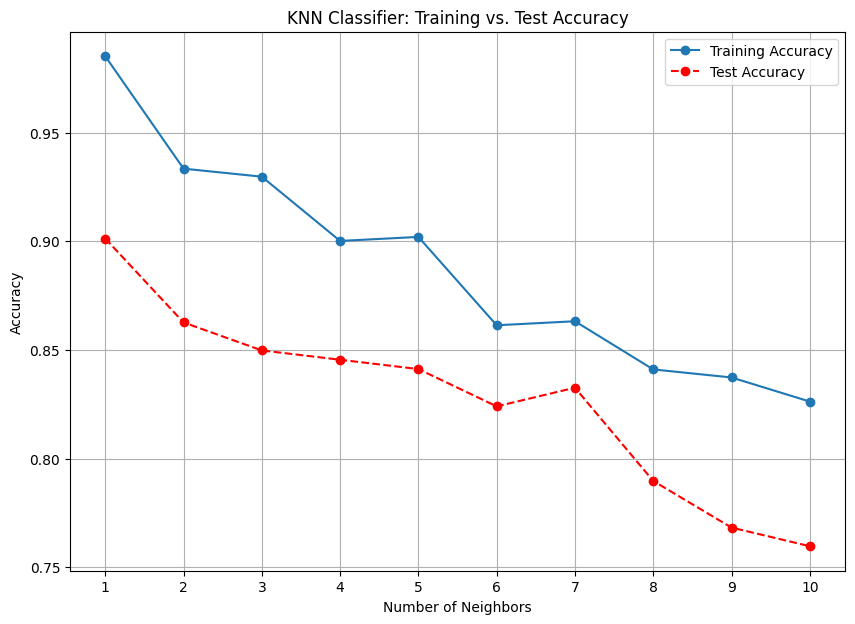

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, max_neighbours + 1), train_accuracies, marker='o', label='Training Accuracy') # Plotting training accuracy
plt.plot(range(1, max_neighbours + 1), test_accuracies, marker='o', linestyle='--', color='red', label='Test Accuracy') # plotting test accuracy
plt.xlabel('Number of Neighbors')                                               # Adding labels & title
plt.ylabel('Accuracy')
plt.title('KNN Classifier: Training vs. Test Accuracy')
plt.legend()                                                                    # Add a legend indicating which colour is which accuracy
plt.xticks(np.arange(1, max_neighbours + 1))                                    # Set number of X-axis tick labels
plt.grid(True)                                                                  # Add a grid for easy interpretations
plt.show()

In [9]:
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the outcome using the specified model both for train and test data
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [10]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

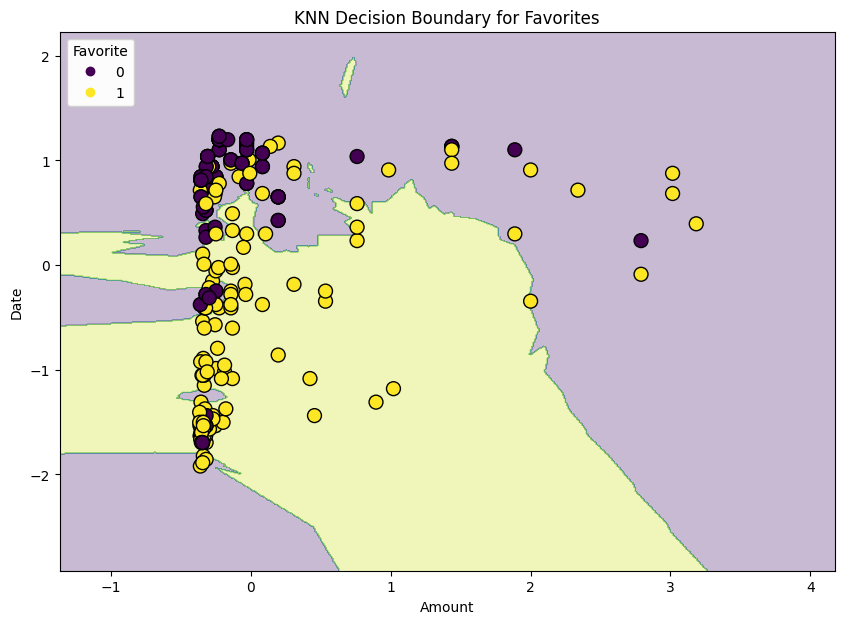

In [15]:
# Assuming xx, yy, and Z are defined for the decision boundary (output of a KNN classifier)
# Plotting
plt.figure(figsize=(10, 7))

# Plotting the decision boundary (contour)
plt.contourf(xx, yy, Z, alpha=0.3)

# Plotting the original data points
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolor='k', s=100)
legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Favorite")
plt.gca().add_artist(legend1)

plt.xlabel('Amount')
plt.ylabel('Date')
plt.title('KNN Decision Boundary for Favorites')
plt.show()

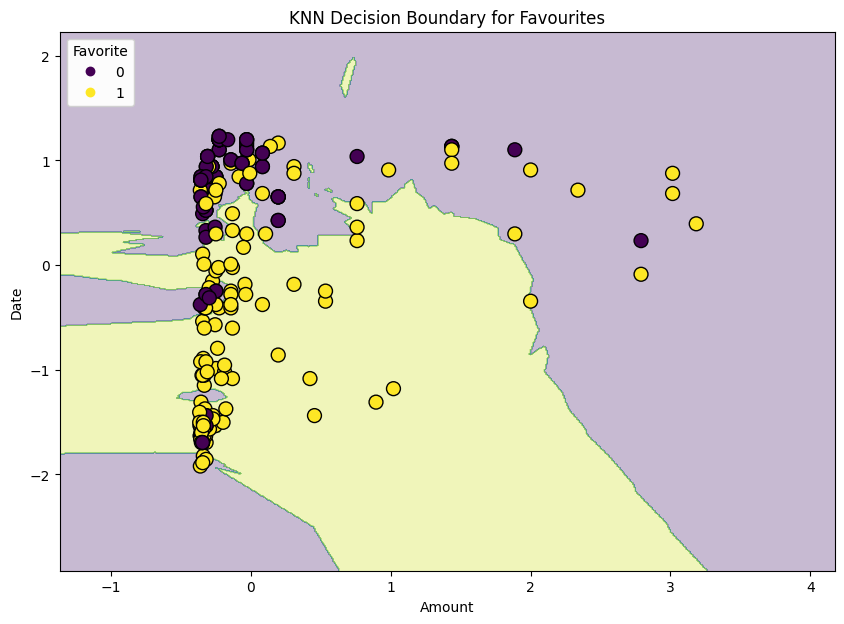

In [12]:
# Plotting
plt.figure(figsize=(10, 7))

# Plotting the decision boundary (contour)
plt.contourf(xx, yy, Z, alpha=0.3)

# Plotting the original data points
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolor='k', s=100)
legend1 = plt.legend(*scatter.legend_elements(), loc="upper left", title="Favorite")
plt.gca().add_artist(legend1)
plt.xlabel('Amount')
plt.ylabel('Date')
plt.title('KNN Decision Boundary for Favourites')
plt.show()